# HealthCare Database

# Performing Exploratory Data Analysis using Python

# OBJECTIVE:-
- Analyzing infromation about Medical Appointments to understand what influences patient's attendance.
- Identifying Patterns to improve appointment attendance rates.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\\Users\\nrish\\Desktop\\healthcare.csv", encoding='unicode_escape');
#unicode_escape prevents errors in conversions 

In [3]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
df.shape

(110527, 14)

In [5]:
df.head()
#gives only top-5 rows

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÃBLICA,0,1,0,0,0,0,No
6,7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812460e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [7]:
df.tail(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110526,3.775120e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Here, we have observed from df.info() that there are NO missing values in any column. 
Let us think, there is a last_column and has 0 values,then we use 
df(['last_column'], axis=1, inplace=True)
here, "axis" means complete row and 
"inplace" represents implement & save changes.
After dropping columns, we can recheck using df.info() again.

# Conversion of Data Types 
We can see ScheduledDay and AppointmentDay are both object Types. Now, let's convert those into DateTime Format.

In [9]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
#ns---> nanoseconds
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [10]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [11]:
df['ScheduledDay'].dt.dayofweek.value_counts()

ScheduledDay
1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: count, dtype: int64

# Data Understanding: We can clearly see that there are no appointments scheduled on Sunday.

In [12]:
df['AppointmentDay'].dt.dayofweek.value_counts()

AppointmentDay
2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: count, dtype: int64

There are No Appointments scheduled for Sunday

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

In [14]:
df.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis=1, inplace=True)

# Checking Null Values

In [15]:
pd.isnull(df)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
110522,False,False,False,False,False,False,False,False,False,False,False
110523,False,False,False,False,False,False,False,False,False,False,False
110524,False,False,False,False,False,False,False,False,False,False,False
110525,False,False,False,False,False,False,False,False,False,False,False


In [16]:
pd.isnull(df).sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Here, we have NO null values. If we have any Null Values, then we can remove those using df.dropna(inplace=True) function and check using df.shape and pd.isnull(df).sum()

In [17]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'No-show'],
      dtype='object')

In [18]:
df.rename(columns={'Gender':'Sex', 'Hipertension':'Hypertension','Handcap':'Handicap', 'No-Show':'NoShow'}, inplace=True)
#renaming the column

In [19]:
df

,Sex,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1,No
110523,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1,No
110524,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1,No
110525,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1,No


In [20]:
df.describe()

,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,110527,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,2016-05-08 20:33:18.179630080,2016-05-19 00:57:50.008233472,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
min,2015-11-10 00:00:00,2016-04-29 00:00:00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-29 00:00:00,2016-05-09 00:00:00,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016-05-10 00:00:00,2016-05-18 00:00:00,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016-05-20 00:00:00,2016-05-31 00:00:00,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2016-06-08 00:00:00,2016-06-08 00:00:00,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000
std,NaN,NaN,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873


# Exploratory Data Analysis

# What is the Gender Distribution?

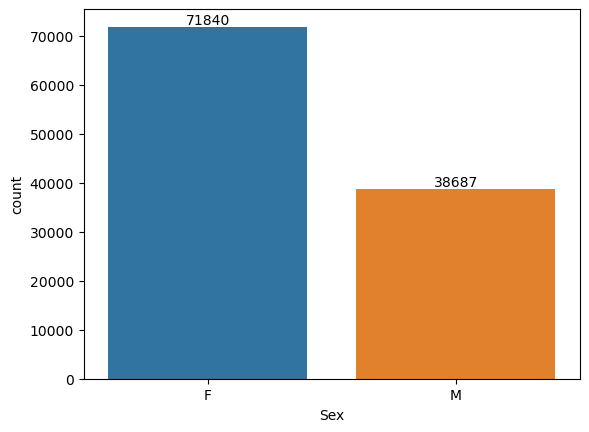

In [21]:
GD = sns.countplot(x='Sex', data=df)
for bars in GD.containers: #for countplot, each bars will be present in containers
    GD.bar_label(bars) #bar_label adds text to each bar

Here, we can observe most appointments are booked by Women.

# How many poeple showed up?

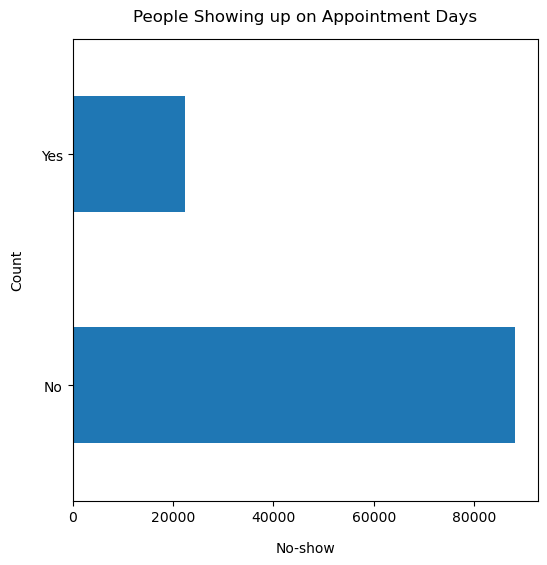

In [22]:
df['No-show'].value_counts().plot(kind='barh', figsize=(6, 6))
plt.xlabel("No-show", labelpad=12)
plt.ylabel("Count", labelpad=12)
plt.title("People Showing up on Appointment Days", y=1.02);

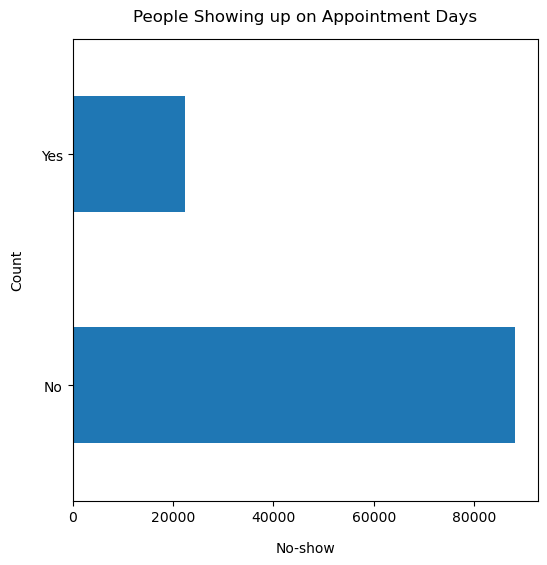

In [23]:
df['No-show'].value_counts().plot(kind='barh', figsize=(6, 6))
plt.xlabel("No-show", labelpad=12)
plt.ylabel("Count", labelpad=12)
plt.title("People Showing up on Appointment Days", y=1.02);

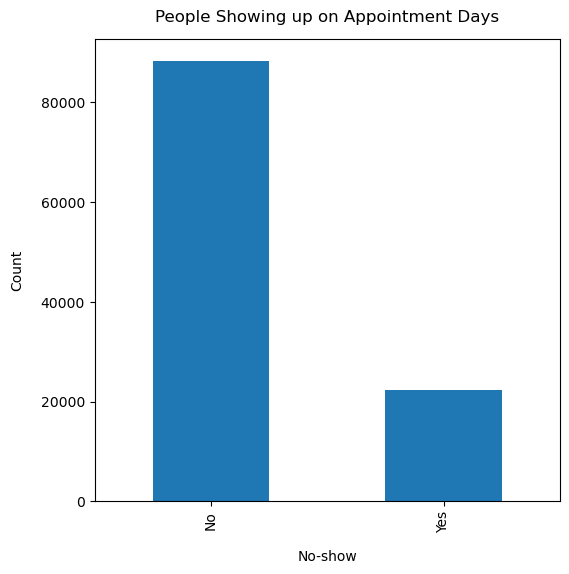

In [24]:
df['No-show'].value_counts().plot(kind='bar', figsize=(6, 6))
plt.xlabel("No-show", labelpad=12)
plt.ylabel("Count", labelpad=12)
plt.title("People Showing up on Appointment Days", y=1.02);

In [25]:
df['No-show'].value_counts()

No-show
No     88208
Yes    22319
Name: count, dtype: int64

# What is the Percentage of attendance?

In [26]:
100*df['No-show'].value_counts()/len(df['No-show'])

No-show
No     79.806744
Yes    20.193256
Name: count, dtype: float64

In [27]:
100*df['No-show'].value_counts()/len(df['No-show'])
#value_counts---> frequency of each unique values
#len--->total no. of values

No-show
No     79.806744
Yes    20.193256
Name: count, dtype: float64

# Appointment Attendance Based on Gender?

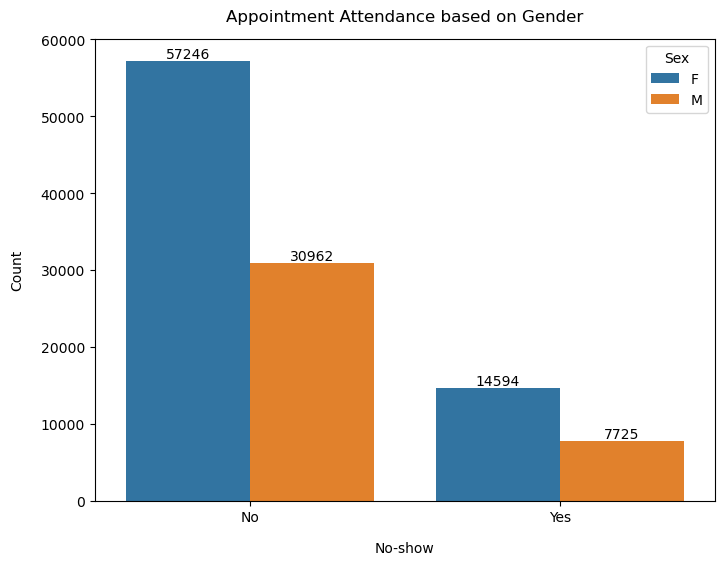

In [28]:
plt.figure(figsize=(8, 6))
AG=sns.countplot(x='No-show', hue='Sex', data=df)
plt.xlabel("No-show", labelpad=12)
plt.ylabel("Count", labelpad=12)
plt.title("Appointment Attendance based on Gender", y=1.02)
plt.legend(title='Sex')
for bars in AG.containers: 
    AG.bar_label(bars) 

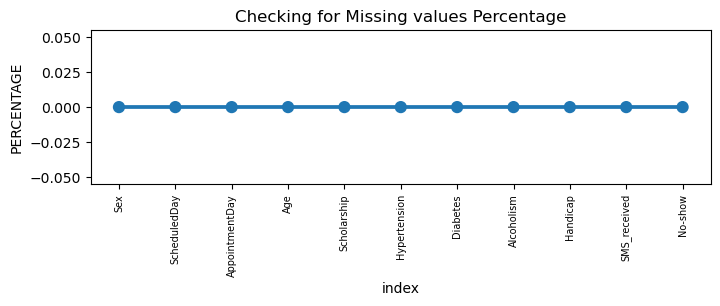

In [29]:
# Checking for missing values in dataset
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(8,2))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7) #rotation is used to display all xlables
plt.title("Checking for Missing values Percentage")
plt.ylabel("PERCENTAGE")
plt.show()

# Data Cleaning - Handling Missing Values:
- If there are less, then we use Regression/KNN Techniques to replace with mean, median, mode.
- If there are more than 30%, then we delete them.

In [ ]:
df['Age'].max()

In [ ]:
#here we have invalid data , so we need to delete it to clean the data 
rows_to_del=df[df['Age']==-1]

In [ ]:
cleaned_age = df.drop(rows_to_del.index)

In [ ]:
cleaned_age

#one row has -1 Age and is deleted.

In [ ]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

df['Age_group'] = pd.cut(df.Age, range(1, 130, 20), right=False, labels=labels)

In [ ]:
df.drop(['Age'], axis=1, inplace=True)

---------- Sex ----------
Sex
F    71840
M    38687
Name: count, dtype: int64
---------- ScheduledDay ----------
ScheduledDay
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: count, Length: 111, dtype: int64
---------- AppointmentDay ----------
AppointmentDay
2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: count, dtype: int64
---------- Age ----------
Age
 0   

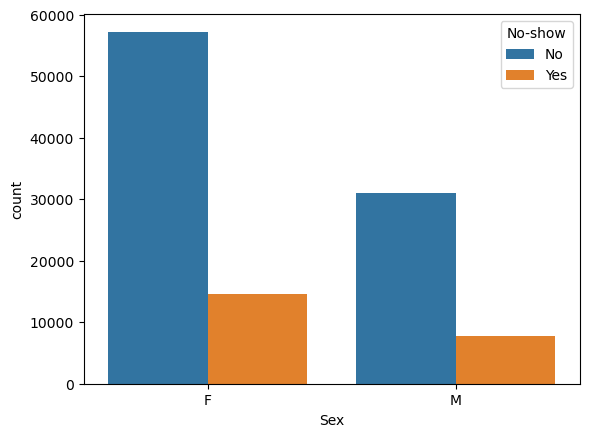

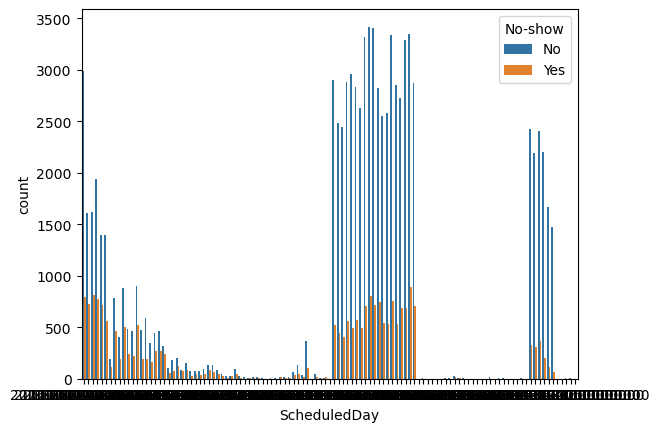

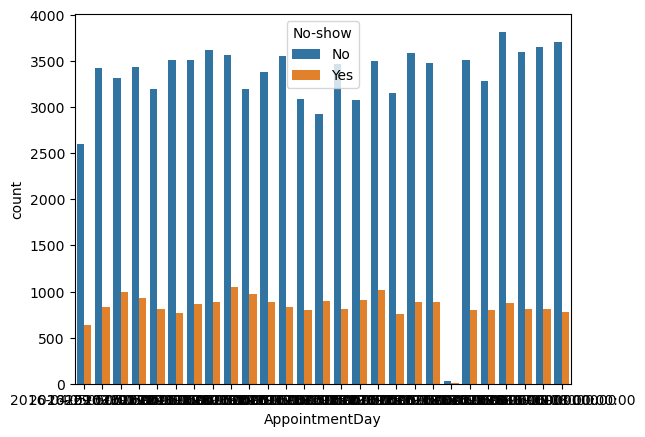

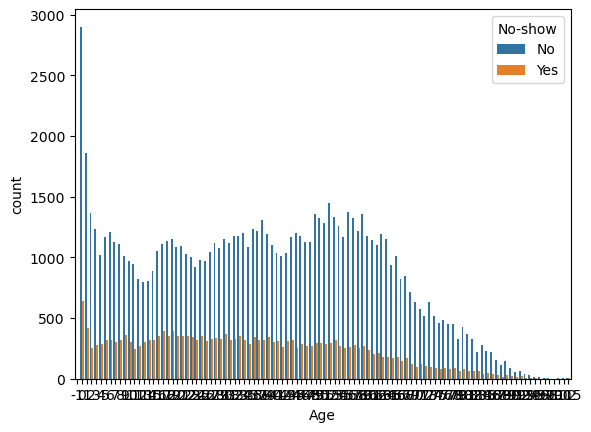

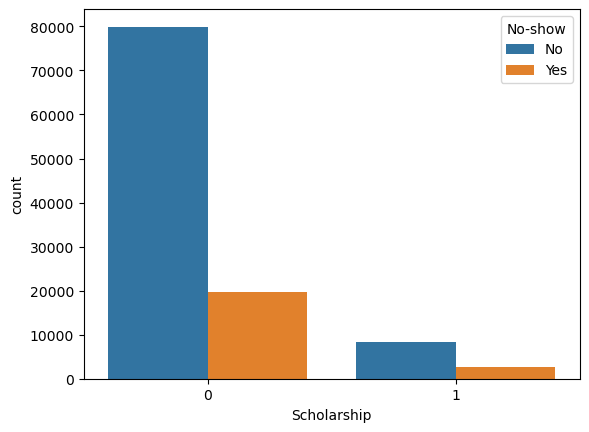

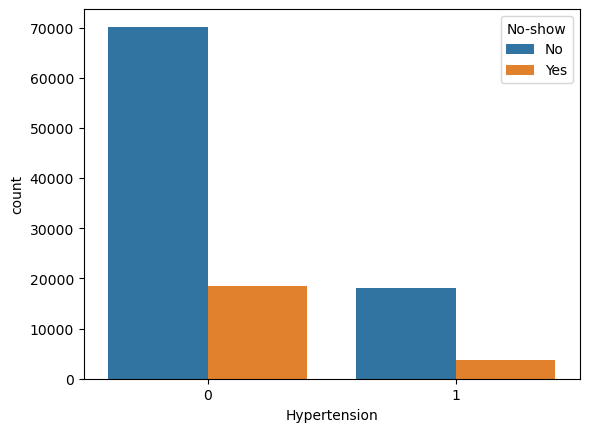

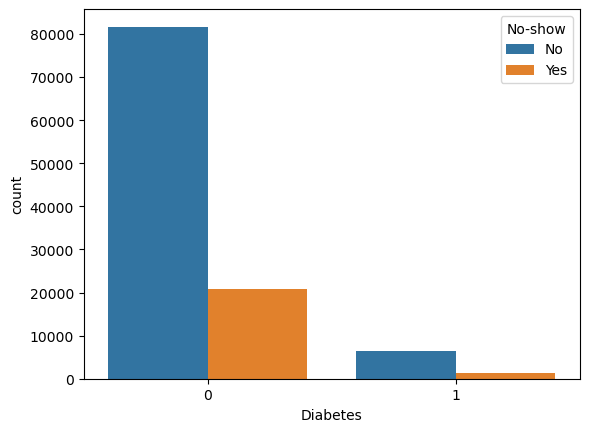

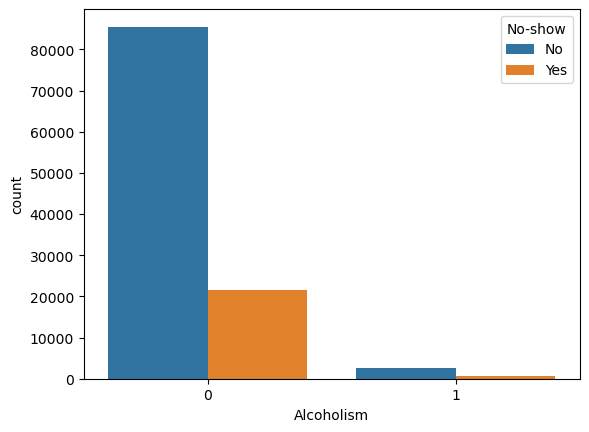

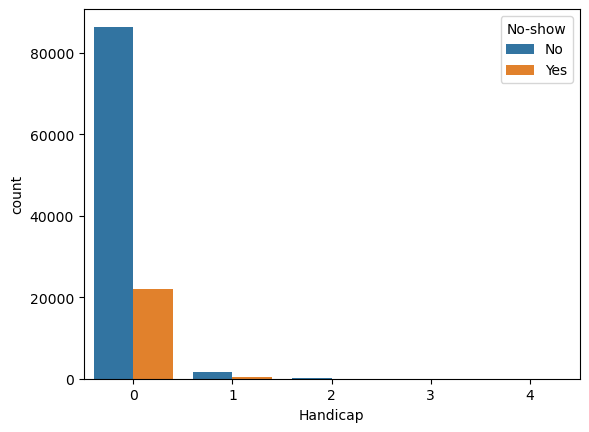

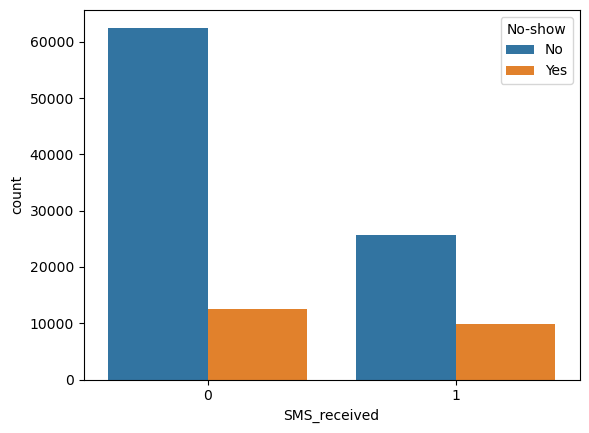

In [33]:
#having a loook into the values of count of each columns and there count in respect to NoShow column
for i, predictor in enumerate(df.drop(columns=['No-show'])):
    print('-'*10,predictor,'-'*10)
    print(df[predictor].value_counts())    
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='No-show')

# Conversion of categorical data

In [ ]:
df.rename(columns={'No-show': 'NoShow'}, inplace=True)

In [ ]:
df['NoShow'] = np.where(df.NoShow == 'Yes',1,0)

In [ ]:
df.NoShow.value_counts()

In [ ]:
df_dummy = pd.get_dummies(df)
df_dummy.head()

In [ ]:
plt.figure(figsize=(20,8))
df_dummy.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df_dummy.corr(), cmap="Paired")

In [ ]:
#having a loook into the values of count of each columns and there count in respect to NoShow column
for i, predictor in enumerate(df.drop(columns=['NoShow'])):
    print('-'*10, predictor, '-'*10)
    print(df[predictor].value_counts())    
    plt.figure(figsize=(10, 6))  # Create a new figure with a specific size
    sns.countplot(data=df, x=predictor, hue='NoShow')
    plt.title(f'Countplot of {predictor} with NoShow')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.xlabel(predictor)
    plt.ylabel('Count')
    plt.legend(title='NoShow')
    plt.show()  # Display the plot


# Performing Bivariate Analysis 


In [ ]:
new_df1_target0=df.loc[df["NoShow"]==0]
new_df1_target1=df.loc[df["NoShow"]==1]

In [ ]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

In [ ]:
uniplot(new_df1_target1,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Sex')

In [ ]:
uniplot(new_df1_target0,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Sex')

In [ ]:
uniplot(new_df1_target1,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Sex')

In [ ]:
uniplot(new_df1_target0,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Sex')

# Outcomes of the project:-


- We have observed that there are more Females than Men when booking Appointments whilst there no appointments booked or scheduled on Sundays.
- Neighborhood showedup 80%. Without Scholarship, 80% visited out of 99666 patients and with scholarship, 75% out of 21801 patients visited.
- Without Hypertension, 78% visited out of 88726 patients and with hypertension, 85% out of 21801 patients visited.
- Without Diabetes, 80% visited out of 102584 patients and with Diabetes, 83% out of 7943 patients visited.
- Without receiving SMS, 84% visited out of 75045 patients and with SMS, 72% out of 35482 patients visited.days